In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import folium

In [27]:
data = pd.read_csv('/content/AB_NYC_2019.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [29]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Qual a média de preço de aluguel região?

In [30]:
data.loc[:,['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).mean().reset_index()

,neighbourhood_group,price
0,Bronx,87.496792
1,Brooklyn,124.383207
2,Manhattan,196.875814
3,Queens,99.517649
4,Staten Island,114.812332


## Qual o maior valor do aluguel por bairro e por tipo de quarto?


In [31]:
data.loc[:,['price', 'neighbourhood', 'room_type']].groupby(['neighbourhood','room_type']).max().reset_index()

,neighbourhood,room_type,price
0,Allerton,Entire home/apt,450
1,Allerton,Private room,142
2,Arden Heights,Entire home/apt,83
3,Arden Heights,Private room,41
4,Arrochar,Entire home/apt,625
...,...,...,...
535,Woodlawn,Shared room,70
536,Woodrow,Entire home/apt,700
537,Woodside,Entire home/apt,500
538,Woodside,Private room,475


## Qual o menor valor de latitude região?






In [32]:
data.loc[:,['latitude', 'neighbourhood_group',]].groupby(['neighbourhood_group']).min().reset_index()

,neighbourhood_group,latitude
0,Bronx,40.80011
1,Brooklyn,40.57115
2,Manhattan,40.70234
3,Queens,40.56546
4,Staten Island,40.49979


## Mapa somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY.

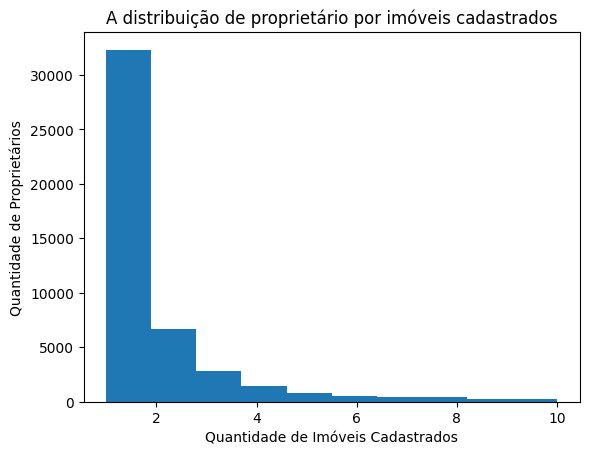

In [33]:
colunas = ['host_id', 'calculated_host_listings_count']

linhas = data.loc[:, 'calculated_host_listings_count'] <= 10

data_plot = data.loc[linhas, 'calculated_host_listings_count']

plt.hist( data_plot, bins=10 );
plt.title( 'A distribuição de proprietário por imóveis cadastrados');
plt.xlabel( 'Quantidade de Imóveis Cadastrados' );
plt.ylabel( 'Quantidade de Proprietários' );



## Mapa com os imóveis mais baratos por região.


In [37]:
colunas = ['price', 'neighbourhood_group','latitude', 'longitude']

colunas_groupby = 'neighbourhood_group'
data_plot = data.loc[:, colunas].groupby(colunas_groupby).min().reset_index()

data_plot

# desenhar o mapa
map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                location_info['longitude']],
                popup=location_info[['neighbourhood_group', 'price']]
                ).add_to(map)
map

## Mapa com os imóveis que possuem o maior número de avaliações por região.


In [36]:
colunas = ['number_of_reviews', 'neighbourhood_group', 'latitude', 'longitude']

colunas_groupby = 'neighbourhood_group'
data_plot = data.loc[:, colunas].groupby( colunas_groupby ).max().reset_index()


data_plot

# Desenhar o mapa
map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                 location_info['longitude']],
                popup=location_info['neighbourhood_group']
                ).add_to(map)
map

## Mapa somente com 100 imóveis do tipo “Private room” sorteados aleatoriamente

In [38]:
colunas = ['room_type', 'latitude', 'longitude']
linhas = data.loc[:, 'room_type'] == 'Private room'

data_plot = data.loc[linhas, colunas].sample(100)

# Desenhar o mapa

map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                 location_info['longitude']],
                popup=location_info['room_type']
                ).add_to(map)

map

## Mapa somente com 100 imóveis do tipo “shared room” sorteados aleatoriamente

In [39]:
colunas = ['room_type', 'latitude', 'longitude']
linhas = data.loc[:, 'room_type'] == 'Shared room'

data_plot = data.loc[linhas, colunas].sample(100)

# Desenhar o mapa

map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                 location_info['longitude']],
                popup=location_info['room_type']
                ).add_to(map)

map

## Mapa somente com 100 imóveis do tipo “Entire home/apt” sorteados aleatoriamente

In [40]:
colunas = ['room_type', 'latitude', 'longitude']
linhas = data.loc[:, 'room_type'] == 'Entire home/apt'

data_plot = data.loc[linhas, colunas].sample(100)

# Desenhar o mapa

map = folium.Map()

for index, location_info in data_plot.iterrows():
  folium.Marker([location_info['latitude'],
                 location_info['longitude']],
                popup=location_info['room_type']
                ).add_to(map)

map

## Valor mais caro de aluguel de cada região?

In [41]:
data_plot = data.loc[:,['price','neighbourhood_group']].groupby(['neighbourhood_group']).max().reset_index()
px.bar(data_plot, x='neighbourhood_group', y='price')

In [42]:
data_plot = data.loc[:,['price', 'neighbourhood_group', 'latitude','longitude']].groupby('neighbourhood_group').max().reset_index()

In [43]:
# conjunto de dados (filtragem linhas e colunas)
colunas = ['neighbourhood_group', 'room_type', 'latitude', 'longitude']
data_plot = data.loc[:, colunas].sample(100)

# criar uma nova coluna chamada 'color'

data_plot.loc[:, 'color'] = 'NA'

linhas_private_room = data_plot.loc[:, 'room_type'] == 'Private room'
linhas_entire_apt = data_plot.loc[:, 'room_type'] == 'Entire home/apt'
linhas_shared_room = data_plot.loc[:, 'room_type'] == 'Shared room'

data_plot.loc[linhas_private_room,'color'] = 'darkgreen'
data_plot.loc[linhas_entire_apt, 'color'] = 'darkred'
data_plot.loc[linhas_shared_room, 'color'] = 'purple'

# desenhar mapa
map = folium.Map()

for index , location_info in data_plot.iterrows():
  folium.Marker(
      [location_info['latitude'], location_info['longitude']],
      popup=location_info['neighbourhood_group'],
      icon=folium.Icon(color=location_info['color'])
  ).add_to(map)
map